In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data=data.fillna(method='bfill')

data.isna().sum()


C:\Users\Dell\AppData\Local\Temp\ipykernel_5912\194116107.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data.shape

(284807, 31)

In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]


In [6]:
x.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69


In [7]:
y.head(2)

,Class
0,0
1,0


In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (213605, 30)

Training data-y- Shape:	 (213605, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (71202, 30)

Testing data(y-Outcome) Shape:	 (71202, 1)


In [10]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('training completefd...')
print()
ypred=gauss_nb.predict(xtest)
print('tesing is done....')
#cost

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
print('Accuracy score: ', accuracy_score(ytest,ypred))
print()
print('='*60)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
print('='*60)
print()
print('Classification Matrix : \n', classification_report(ytest,ypred)) 
print('='*60)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training completefd...

tesing is done....
Accuracy score:  0.992753012555827

Confusion Matrix:
 [[70609   486]
 [   30    77]]

Classification Matrix : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71095
           1       0.14      0.72      0.23       107

    accuracy                           0.99     71202
   macro avg       0.57      0.86      0.61     71202
weighted avg       1.00      0.99      1.00     71202



In [11]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
sc_x=std_sc.fit_transform(x)

In [12]:
sc_x

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=.2,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (227845, 30)

Training data-y- Shape:	 (227845, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (56962, 30)

Testing data(y-Outcome) Shape:	 (56962, 1)


In [14]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('training completefd...')
print()
ypred=gauss_nb.predict(xtest)
print('tesing is done....')
#cost

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
print('Accuracy score: ', accuracy_score(ytest,ypred))
print()
print('='*60)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
print('='*60)
print()
print('Classification Matrix : \n', classification_report(ytest,ypred)) 
print('='*60)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training completefd...

tesing is done....
Accuracy score:  0.9778097679154524

Confusion Matrix:
 [[55624  1254]
 [   10    74]]

Classification Matrix : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.06      0.88      0.10        84

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Count of 0s: Class    284315
dtype: int64
Count of 1s: Class    492
dtype: int64


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


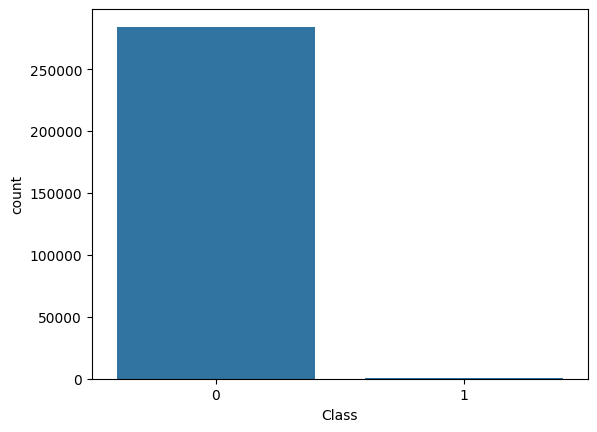

In [15]:
sns.countplot(data,x='Class')
  # Replace with your target variable

count_zeros = np.sum(y == 0)
count_ones = np.sum(y == 1)

print("Count of 0s:", count_zeros)
print("Count of 1s:", count_ones)


Majority lenght:	 284315

Minority Length:	 492
(568630, 31)



<Axes: xlabel='Class', ylabel='count'>

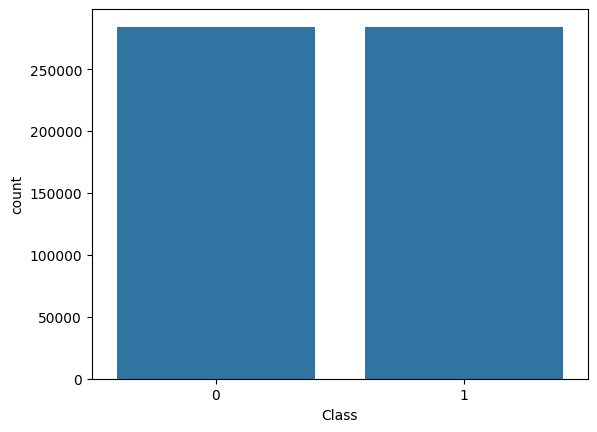

In [16]:
from sklearn.utils import resample
df_majority=data[data.Class==0]
df_minority=data[data.Class==1]
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_minority_upsampled=resample(df_minority,
 replace=True, # sample with replacement
 n_samples=284315, #to match the majority class
 random_state=12
 )
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
print(df_upsampled.shape)
print()
#print(sns.countplot(df_upsampled['Outcome'])
sns.countplot(df_upsampled,x='Class')

In [17]:
df_upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('training completefd...')
print()
ypred=gauss_nb.predict(xtest)
print('tesing is done....')
#cost

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
print('Accuracy score: ', accuracy_score(ytest,ypred))
print()
print('='*60)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
print('='*60)
print()
print('Classification Matrix : \n', classification_report(ytest,ypred)) 
print('='*60)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training completefd...

tesing is done....
Accuracy score:  0.9778097679154524

Confusion Matrix:
 [[55624  1254]
 [   10    74]]

Classification Matrix : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.06      0.88      0.10        84

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Majority lenght:	 284315

Minority Length:	 492
(984, 31)

Axes(0.125,0.11;0.775x0.77)


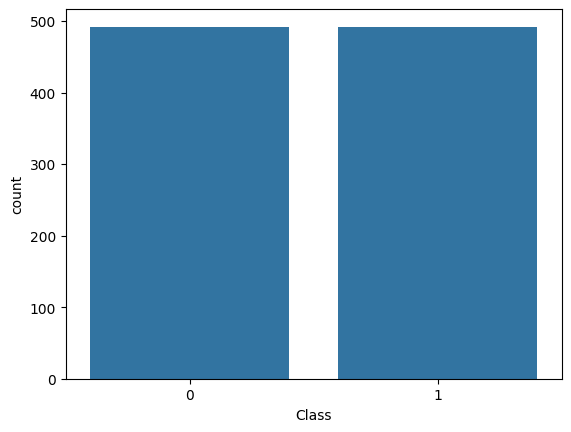

In [22]:
from sklearn.utils import resample
df_majority=data[data.Class==0]
df_minority=data[data.Class==1]
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_majority_downsampled=resample(df_majority,
 replace=False, # sample with replacement
 n_samples=492 ,#to match the majority class
 random_state=12
 )
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
print(df_downsampled.shape)
print()
print(sns.countplot(df_downsampled,x='Class'))


In [23]:
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (738, 30)

Training data-y- Shape:	 (738, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (246, 30)

Testing data(y-Outcome) Shape:	 (246, 1)


In [24]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('training completefd...')
print()
ypred=gauss_nb.predict(xtest)
print('tesing is done....')
#cost

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
print('Accuracy score: ', accuracy_score(ytest,ypred))
print()
print('='*60)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
print('='*60)
print()
print('Classification Matrix : \n', classification_report(ytest,ypred)) 
print('='*60)

training completefd...

tesing is done....
Accuracy score:  0.8455284552845529

Confusion Matrix:
 [[113   0]
 [ 38  95]]

Classification Matrix : 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       113
           1       1.00      0.71      0.83       133

    accuracy                           0.85       246
   macro avg       0.87      0.86      0.84       246
weighted avg       0.88      0.85      0.84       246



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#pca

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [87]:
from sklearn.datasets import load_breast_cancer


In [67]:
cancer=load_breast_cancer()


In [68]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [69]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [70]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [71]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [74]:
scaled_data=scaler.transform(df)

In [75]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca=PCA(n_components=2)

In [78]:
pca.fit(scaled_data)

PCA(n_components=2)

In [79]:
x_pca=pca.transform(scaled_data)

In [80]:
scaled_data.shape

(569, 30)

In [81]:
x_pca.shape

(569, 2)

In [82]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [83]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second principle component')

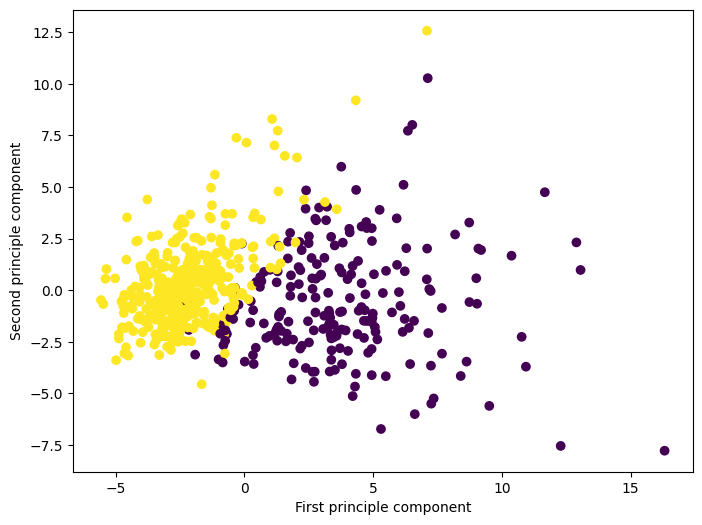

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [ ]:
#lda

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
data=pd.read_csv('diabetes_with_names.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [90]:
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [91]:
data=data.fillna(method='bfill')
data.isna().sum()


C:\Users\Dell\AppData\Local\Temp\ipykernel_5912\249740467.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [92]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]


In [94]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 



In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [100]:
clf=LDA() 
clf.fit(xtrain,ytrain)
clf.score(xtrain,ytrain)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.78125

In [101]:
y_pred=clf.predict(xtest)

In [102]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('training completefd...')
print()
ypred=gauss_nb.predict(xtest)
print('tesing is done....')
#cost


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
print('Accuracy score: ', accuracy_score(ytest,y_pred))
print()
print('='*60)
print('Confusion Matrix:\n', confusion_matrix(ytest, y_pred))
print('='*60)
print()
print('Classification Matrix : \n', classification_report(ytest,y_pred)) 
print('='*60)

training completefd...

tesing is done....
Accuracy score:  0.765625

Confusion Matrix:
 [[120  14]
 [ 31  27]]

Classification Matrix : 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.66      0.47      0.55        58

    accuracy                           0.77       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.75      0.77      0.75       192



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


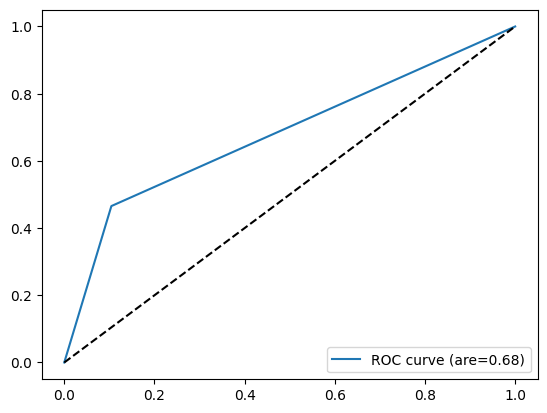

In [111]:
fpr, tpr, thresholds=metrics.roc_curve(ytest,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [112]:
import pandas as pd
df=pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
###  Independent And dependent features
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [114]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [115]:
X=X.dropna(axis=1)

In [116]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

HoldOut Validation Approach- Train And Test Split

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9035087719298246


K Fold Cross Validation

In [120]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [121]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.9122807  0.9122807  0.89473684 0.94736842 0.92982456 0.98245614
 0.9122807  0.96491228 0.96491228 0.94642857]
0.9367481203007519


Leave One Out Cross Validation(LOOCV)

In [122]:
from sklearn.model_selection import LeaveOneOut
model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)

In [123]:
results

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [124]:
print(np.mean(results))

0.9349736379613357
